In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_startups = pd.read_csv('/Users/Sneha/Desktop/startup_funding.csv')
df_startups.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


#### 1. Check the trend of investments over the years. To check the trend, find - Total number of fundings done in each year.
#### Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis. Print year-wise total number of fundings also. Print years in ascending order.
#### Note : There is some error in the 'Date' feature. Make sure to handle that.

In [46]:
df_fund = df_startups.copy()

df_fund['Date'].replace("12/05.2015", "12/05/2015", inplace = True)
df_fund['Date'].replace("13/04.2015", "13/04/2015", inplace = True)
df_fund['Date'].replace("15/01.2015", "15/01/2015", inplace = True)
df_fund['Date'].replace("22/01//2015", "22/01/2015", inplace = True)

df_fund['yyyy'] = pd.to_datetime(df_fund['Date']).dt.year
funds = df_fund['yyyy'].value_counts()
funds = funds.sort_index()

for index, values in funds.iteritems():
     print(index, values)

2015 936
2016 993
2017 443


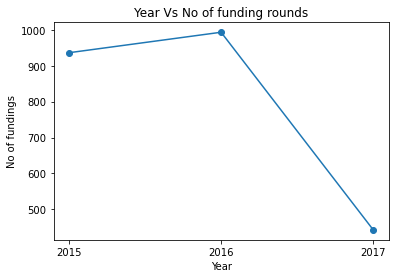

In [56]:
# Graph between years and number of fundings
year_funds = funds.index.tolist()
funds_value= funds.values.tolist()

plt.plot(year_funds, funds_value, marker = 'o')
plt.xticks(year_funds)
plt.title("Year Vs No of funding rounds")
plt.xlabel('Year')
plt.ylabel('No of fundings')
plt.show()

#### 2. Find out which cities are generally chosen for starting a startup. Find top 10 Indian cities which have most number of startups ?
#### Plot a pie chart and visualise it. Print the city name and number of startups in that city also.
#### Note: Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first. Print the city in descending order with respect to the number of startups.

In [3]:
df_cities = df_startups.copy()
#df_cities.CityLocation.isnull().sum()

df_cities = df_cities[df_cities['CityLocation'].notna()]

def twoCities(city):
    return city.split('/')[0].strip()

df_cities['CityLocation'] = df_cities['CityLocation'].apply(twoCities)
df_cities['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
df_cities['CityLocation'].replace("bangalore", "Bangalore", inplace = True)

number_of_cities = df_cities['CityLocation'].value_counts()[0:10]
city = number_of_cities.index
num_startups = number_of_cities.values

for i in range(len(city)):
    print(city[i], num_startups[i])

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


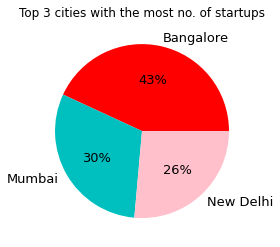

In [93]:
# pie chart for top 3 cities and startups
city_top3 = ['Bangalore', 'Mumbai', 'New Delhi']
num_startups_top3 = [635, 449, 389]

textprops = {"fontsize":13}
colors = ["r", "c", "pink"]
plt.title("Top 3 cities with the most no. of startups")
plt.pie(num_startups_top3, labels = city_top3, autopct= "%.0f%%", textprops = textprops, colors = colors)
plt.show()

#### 3. From the above question, find out percentage of funding each city has got (among top 10 Indian cities only). Print the city and percentage with 2 decimal place after rounding off. Print the city in descending order with respect to the percentage of funding.

In [54]:
df_cities['AmountInUSD'] = df_cities['AmountInUSD'].apply(lambda x:float(str(x).replace(',' , '')))
df_cities['AmountInUSD'] = pd.to_numeric(df_cities['AmountInUSD'])

amount = df_cities.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending = False)[0:10]
fund_city = amount.index
fund_amount = amount.values
percentage_fund_amount = np.true_divide(fund_amount, fund_amount.sum())* 100

for i in range(len(fund_city)):
    print(city[i], format(percentage_fund_amount[i],'.2f'))
    

Bangalore 49.71
Mumbai 16.63
New Delhi 13.90
Gurgaon 12.21
Pune 2.43
Noida 2.16
Hyderabad 1.15
Chennai 1.01
Ahmedabad 0.58
Jaipur 0.21


#### 4. There are 4 different type of investments. Find out percentage of amount funded for each investment type. Plot a pie chart to visualise. Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
#### Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
#### Print the investment type in descending order with respect to the percentage of the amount funded.

In [121]:
df_investments = df_startups.copy()
#print(df_investments['InvestmentType'].unique())

df_investments['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace = True)
df_investments['InvestmentType'].replace('SeedFunding', 'Seed Funding', inplace = True)
df_investments['InvestmentType'].replace('Crowd funding', 'Crowd Funding', inplace = True)

df_investments['AmountInUSD'] = df_investments['AmountInUSD'].apply(lambda x: float(str(x).replace(',' , '')))
df_investments['AmountInUSD'] = pd.to_numeric(df_investments['AmountInUSD'])

investment_type = df_investments.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending = False)
invest = investment_type.index
funding_amount = investment_type.values
percentage_funding = np.true_divide(funding_amount, funding_amount.sum())*100

for i in range(len(invest)):
    print(invest[i], format(percentage_funding[i], '.2f'))

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


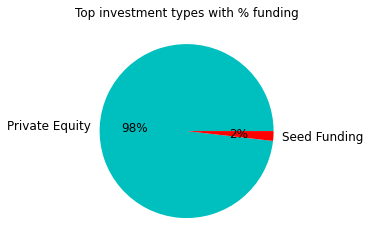

In [120]:
#pie chart for top 2 investment types and funding 

inv_type = ['Private Equity', 'Seed Funding']
percent_fund = [98.15, 1.81]

textprops = {"fontsize":12}
colors = ["c", "r"]
# plt.title("Top 3 cities with the most no. of startups")
labels = inv_type
plt.title("Top investment types with % funding")
plt.pie(percent_fund,labels = inv_type, autopct= "%.0f%%", textprops = textprops, colors = colors)

plt.show()

#### 5. Which type of companies got more fundings?  To answer this question, find -Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only).
#### Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
#### Note :Ecommerce is the right word in IndustryVertical, so correct it. Print the industry in descending order with respect to the percentage of the amount funded.

In [181]:
df_ind = df_startups.copy()
#df_ind['IndustryVertical'].unique()
df_ind['IndustryVertical'].replace('eCommerce', 'Ecommerce', inplace = True)
df_ind['IndustryVertical'].replace('ecommerce', 'Ecommerce', inplace = True)
df_ind['IndustryVertical'].replace('ECommerce', 'Ecommerce', inplace = True)

df_ind['AmountInUSD'] = df_ind['AmountInUSD'].apply(lambda x:float(str(x).replace(',' , '')))
df_ind['AmountInUSD'] = pd.to_numeric(df_ind['AmountInUSD'])

ind_amount = df_ind.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)[0:5]
industry = ind_amount.index
fund = ind_amount.values

percent_fund = np.true_divide(fund, fund.sum())* 100


for i in range(len(industry)):
    print(industry[i], format(percent_fund[i],'.2f'))

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


#### 6. Find top 5 startups with most amount of total funding. Print the startup name in descending order with respect to amount of funding. Note: Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

In [172]:
df_start = df_startups.copy()
#print(df_start['StartupName'].unique()

df_start['StartupName'].replace('Olacabs', 'Ola', inplace = True)
df_start['StartupName'].replace('Ola Cabs', 'Ola', inplace = True)
df_start['StartupName'].replace('Flipkart.com', 'Flipkart', inplace = True)
df_start['StartupName'].replace('Paytm Marketplace', 'Paytm', inplace = True)
df_start['StartupName'].replace('Oyo Rooms', 'Oyo', inplace = True)
df_start['StartupName'].replace('Oyorooms', 'Oyo', inplace = True)
df_start['StartupName'].replace('OyoRooms', 'Oyo', inplace = True)
df_start['StartupName'].replace('OYO Rooms', 'Oyo', inplace =True)

df_start['AmountInUSD'] = df_start['AmountInUSD'].apply(lambda x:float(str(x).replace(',' , '')))
df_start['AmountInUSD'] = pd.to_numeric(df_start['AmountInUSD'])
startups = df_start.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending= False)[0:5]
startup_name = startups.index
startup_fund = startups.values

for name in startup_name:
    print(name)

Paytm
Flipkart
Ola
Snapdeal
Oyo


#### 7. Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times. Print the startup name in descending order with respect to the number of funding round as integer value.
#### Note: Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones

In [182]:
# continued from question 6
startup_rounds = df_start['StartupName'].value_counts()[0:5]

for index, values in startup_rounds.iteritems():
     print(index, values)

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


#### 8. Find the Investors who have invested maximum number of times. Print the investor name and number of times invested as integer value.
#### Note: In startup, multiple investors might have invested. So consider each investor for that startup. Ignore the undisclosed investors.

In [276]:
df_inv = df_startups.copy()
#df_inv['InvestorsName'].isnull().sum()
df_inv = df_inv[df_inv['InvestorsName'].notna()]

df_inv = df_inv[(df_inv['InvestorsName'] != 'Undisclosed Investors') & (df_inv['InvestorsName'] != 'Undisclosed investors')
               & (df_inv['InvestorsName'] != 'undisclosed investors') & (df_inv['InvestorsName'] != 'undisclosed Investors')]

investors= df_inv['InvestorsName']
investors = investors.values

investor_count = {}

for i in investors:
    if ',' not in i:
        if i in investor_count:
            investor_count[i] = investor_count.get(i) + 1
        else:
            investor_count[i] = 1
    else:
        string = i.strip().split(',')
        for j in string:
            if j.strip() in investor_count:
                investor_count[j.strip()] = investor_count.get(j.strip()) + 1
            else:
                investor_count[j.strip()] = 1

investor_count_df = pd.DataFrame(list(investor_count.values()), list(investor_count.keys()))
investor_count_df = investor_count_df.sort_values(by= [0], ascending = False)
print(investor_count_df.index[0], investor_count_df.values[0][0])

Sequoia Capital 64
